<a href="https://colab.research.google.com/github/Jed-77/tensorflow-deeplearning/blob/master/TF2_0_CIFAR_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN for CIFAR database. Contains colour images for a range of classes.

In [0]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [0]:
# Load in the data. 
# Also we will normalise the values from 0->255 to 0->1
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
# so we have 50000 images
# each 32 by 32 pixels
# and 3 deep for RGB

170500096/170498071 [==============================] - 12s 0us/step
x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)


In [0]:
# Number of classes
K = len(set(y_train))
print("Number of Classes: ", K)

Number of Classes:  10


In [0]:
# Build the model using the functional API
# padding is same and no stride so the image size doesn't change on each convolution
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Look at some diagrams of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496 

In [0]:
# Compile the model and fit (use the GPU!)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2863 - accuracy: 0.5574 - val_loss: 1.0882 - val_accuracy: 0.6262
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8395 - accuracy: 0.7105 - val_loss: 0.8056 - val_accuracy: 0.7184
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6816 - accuracy: 0.7641 - val_loss: 0.7635 - val_accuracy: 0.7419
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5877 - accuracy: 0.8015 - val_loss: 0.9412 - val_accuracy: 0.6912
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4883 - accuracy: 0.8310 - val_loss: 0.7382 - val_accuracy: 0.7701
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4185 - accuracy: 0.8552 - val_loss: 0.6379 - val_accuracy: 0.7958
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3478 - accuracy: 0.8796 - val_loss: 0.5660 - val_ac

In [0]:
# Fit with data augmentation
# recall with kereas, if you call train on a model it will continue with the weights we have already trained, pretty cool!
batch_size=32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
1562/1562 [==============================] - 36s 23ms/step - loss: 0.6098 - accuracy: 0.8010 - val_loss: 0.5584 - val_accuracy: 0.8190
Epoch 2/15
1562/1562 [==============================] - 35s 23ms/step - loss: 0.5072 - accuracy: 0.8319 - val_loss: 0.5263 - val_accuracy: 0.8267
Epoch 3/15
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4708 - accuracy: 0.8416 - val_loss: 0.4716 - val_accuracy: 0.8437
Epoch 4/15
1562/1562 [==============================] - 36s 23ms/step - loss: 0.4382 - accuracy: 0.8504 - val_loss: 0.4743 - val_accuracy: 0.8432
Epoch 5/15
1562/1562 [==============================] - 35s 23ms/step - loss: 0.4120 - accuracy: 0.8586 - val_loss: 0.4471 - val_accuracy: 0.8516
Epoch 6/15
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3966 - accuracy: 0.8656 - val_loss: 0.4844 - val_accuracy: 0.8462
Epoch 7/15
1562/1562 [==========================

[]


AttributeError: ignored

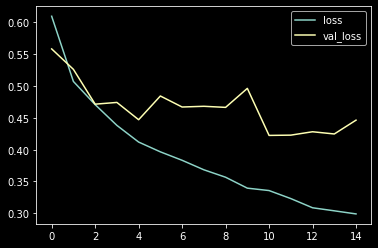

In [0]:
# Plot the loss - VAL = Validation (i.e test data!)
from matplotlib import style
style.use('dark_background')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

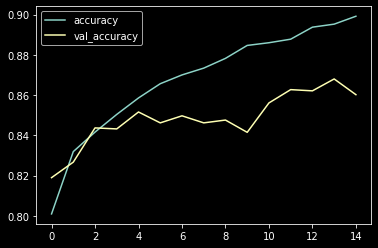

In [0]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Non-normalised Confusion Matrix
[[940  11  14   2   3   2   4   4  16   4]
 [  3 978   0   0   0   0   1   0   2  16]
 [ 62   1 793  11  31  25  46  23   4   4]
 [ 35   4  46 600  47 140  66  41  10  11]
 [ 16   1  27  15 842  18  36  39   5   1]
 [ 12   3  27  57  26 805  25  38   1   6]
 [ 12   1  13  14   9   8 934   2   3   4]
 [  8   1   8   6  15   9   2 947   1   3]
 [ 66  18   4   3   0   1   5   0 895   8]
 [ 30  86   2   1   2   2   2   2   5 868]]


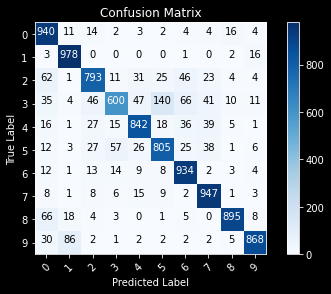

In [0]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalise=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  """
  if normalise:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised Confusion Matrix.")
  else:
    print("Non-normalised Confusion Matrix")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalise else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


# run this
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# Labels
labels = '''airplane
autombile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True: frog, Predicted: truck')

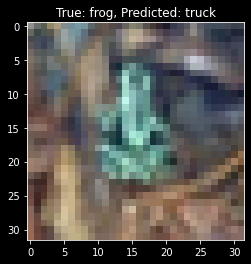

In [0]:
# Show some of the misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True: {}, Predicted: {}".format(labels[y_test[i]], labels[p_test[i]]))